In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
from six.moves import cPickle as pickle
from mpl_toolkits.mplot3d import Axes3D

In [10]:
pickle_file = os.path.join( os.getcwd(), 'upsets_direct_law.pickle')

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    match_numbers = save['match_numbers']
    phis = np.array(save['phis'])
    thetas = save['thetas']
    phi_targets = save['phi_targets']
    theta_targets = save['theta_targets']
    del save  # hint to help gc free up memory

match_numbers = np.array(match_numbers) 
phis = np.array(phis) 
thetas = np.array(thetas) 
phi_targets = np.array(phi_targets) 
theta_targets = np.array(theta_targets) 

unique_thetas = np.sort(np.array(list(set(theta_targets))))
unique_phis = np.sort(np.array(list(set(phi_targets))))




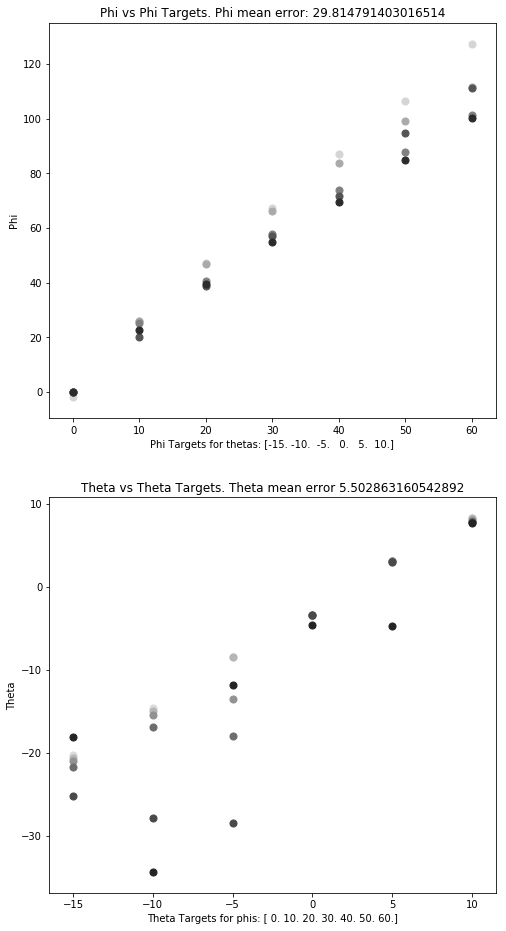

In [11]:

f, axarr = plt.subplots(2, figsize=(8, 16))


error = np.mean(np.abs(phis - phi_targets))
#print('Phi mean error ' + str(error))

for index, theta in enumerate(unique_thetas):
    Colour = (255 - index * 255/(1*len(unique_thetas)))/255
    show_index = np.where(theta_targets == theta)
    axarr[0].scatter(phi_targets[show_index], phis[show_index],s=50, alpha=1.0, color=(Colour,Colour,Colour))

axarr[0].set_title('Phi vs Phi Targets. Phi mean error: ' + str(error))
axarr[0].set(xlabel='Phi Targets for thetas: '+ str(unique_thetas))
axarr[0].set(ylabel='Phi')


error = np.mean(np.abs(thetas - theta_targets))
#print('Theta mean error ' + str(error))

for index, phi in enumerate(unique_phis):
    Colour = (255 - index * 255/(1*len(unique_phis)))/255
    show_index = np.where(phi_targets == phi)
    axarr[1].scatter(theta_targets[show_index], thetas[show_index],s=50, alpha=1.0, color=(Colour,Colour,Colour))

axarr[1].set_title('Theta vs Theta Targets. Theta mean error '+ str(error))
axarr[1].set(xlabel='Theta Targets for phis: '+ str(unique_phis))
axarr[1].set(ylabel='Theta')

plt.show()

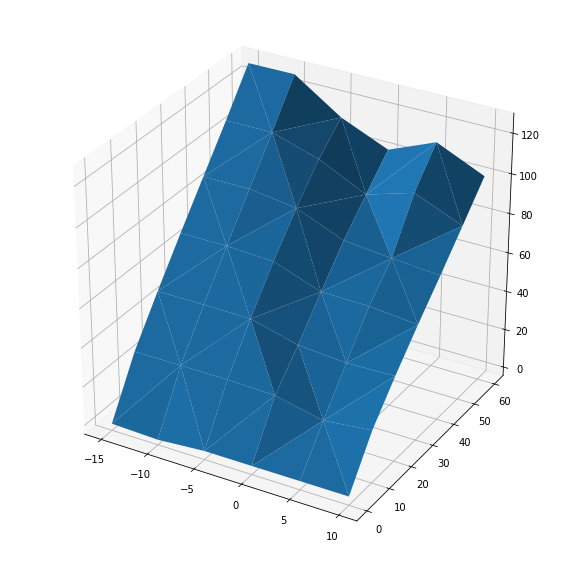

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(theta_targets, phi_targets, phis, linewidth=0.2, antialiased=True)
#ax.scatter(theta_targets, phi_targets, phis, zdir='z', s=20, c=None, depthshade=True,facecolor='green', alpha=0.8)

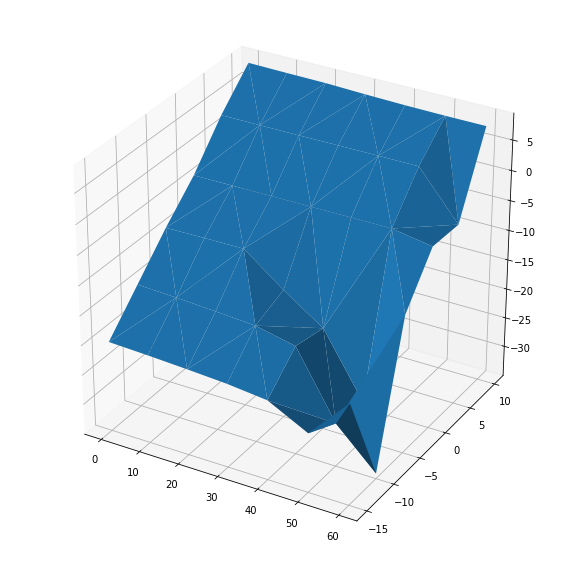

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(phi_targets, theta_targets, thetas, linewidth=0.2, antialiased=True)

In [ ]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Set up the data with a noisy linear relationship between X and Y.
num_examples = 50
X = np.array([np.linspace(-2, 4, num_examples), np.linspace(-6, 6, num_examples)])
X += np.random.randn(2, num_examples)
x, y = X
bias_with_x = np.array([(1., a) for a in x]).astype(np.float32)

losses = []
training_steps = 50
learning_rate = 0.002

with tf.Session() as sess:
    # Set up all the tensors, variables, and operations.
    input = tf.constant(bias_with_x)
    target = tf.constant(np.transpose([y]).astype(np.float32))
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    tf.global_variables_initializer().run()

    yhat = tf.matmul(input, weights)
    yerror = tf.subtract(yhat, target)
    loss = tf.nn.l2_loss(yerror)
  
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
    for _ in range(training_steps):
        # Repeatedly run the operations, updating the TensorFlow variable.
        update_weights.run()
        losses.append(loss.eval())

    # Training is done, get the final values for the graphs
    betas = weights.eval()
    yhat = yhat.eval()

# Show the fit and the loss over time.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)
ax1.scatter(x, y, alpha=.7)
ax1.scatter(x, np.transpose(yhat)[0], c="g", alpha=.6)
line_x_range = (-4, 6)
ax1.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
ax2.plot(range(0, training_steps), losses)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Training steps")
plt.show()